In [1]:
import os
import pandas as pd
from scipy.misc import imread
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential



Using TensorFlow backend.
C:\Users\priya\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\priya\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\priya\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\priya\anaconda3\envs\te

In [2]:
### LOADING DATASET
data_dir = os.path.abspath('C:/Users/priya/Desktop/IMS Proschool/Data Science Projects/German Traffic Sign Classification Using CNN and Keras/Traffic-Sign-Recognition-master/GTSRB/Final_Training/Images')
os.path.exists(data_dir)



True

In [3]:
### Function to resize the images using open cv
def resize_cv(im):
    return cv2.resize(im, (64, 64), interpolation = cv2.INTER_LINEAR)

In [4]:
### Loading datset
list_images = []
output = []
for dir in os.listdir(data_dir):
    if dir == '.DS_Store' :
        continue
    
    inner_dir = os.path.join(data_dir, dir)
    csv_file = pd.read_csv(os.path.join(inner_dir,"GT-" + dir + '.csv'), sep=';')
    for row in csv_file.iterrows() :
        img_path = os.path.join(inner_dir, row[1].Filename)
        img = imread(img_path)
        img = img[row[1]['Roi.X1']:row[1]['Roi.X2'],row[1]['Roi.Y1']:row[1]['Roi.Y2'],:]
        img = resize_cv(img)
        list_images.append(img)
        output.append(row[1].ClassId)

 


C:\Users\priya\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  if sys.path[0] == '':


C:\Users\priya\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


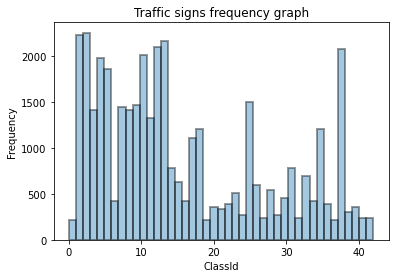

In [5]:
### Plotting the dataset
fig = sns.distplot(output, kde=False, bins = 43, hist = True, hist_kws=dict(edgecolor="black", linewidth=2))
fig.set(title = "Traffic signs frequency graph",
        xlabel = "ClassId",
        ylabel = "Frequency")

input_array = np.stack(list_images)

train_y = keras.utils.np_utils.to_categorical(output)



In [6]:
### Randomizing the dataset
randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
x = input_array[randomize]
y = train_y[randomize]


In [7]:
### Splitting the dataset in train, validation, test set
split_size = int(x.shape[0]*0.6)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

split_size = int(val_x.shape[0]*0.5)
val_x, test_x = val_x[:split_size], val_x[split_size:]
val_y, test_y = val_y[:split_size], val_y[split_size:]



In [8]:

### Building the model
hidden_num_units = 2048
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43

epochs = 10
batch_size = 16
pool_size = (2, 2)
input_shape = Input(shape=(32, 32,3))

model = Sequential([

 Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])



In [17]:
### Training the model
trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))                               



Train on 23525 samples, validate on 7842 samples
Epoch 1/10
23525/23525 [==============================] - 1140s 48ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0279 - val_accuracy: 0.9929
Epoch 2/10
23525/23525 [==============================] - 1213s 52ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0252 - val_accuracy: 0.9940
Epoch 3/10
23525/23525 [==============================] - 1117s 47ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0269 - val_accuracy: 0.9943
Epoch 4/10
23525/23525 [==============================] - 7445s 316ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0211 - val_accuracy: 0.9946
Epoch 5/10
23525/23525 [==============================] - 1198s 51ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 6/10
23525/23525 [==============================] - 1357s 58ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0327 - val_accuracy: 0.9931
Epoch 7/10
23525/23525 [==========================

In [18]:
### Prdicting the class
pred = model.predict_classes(test_x)

In [19]:
### Evaluating the model
model.evaluate(test_x, test_y)


7842/7842 [==============================] - 89s 11ms/step


[0.02980699311680568, 0.9948992729187012]

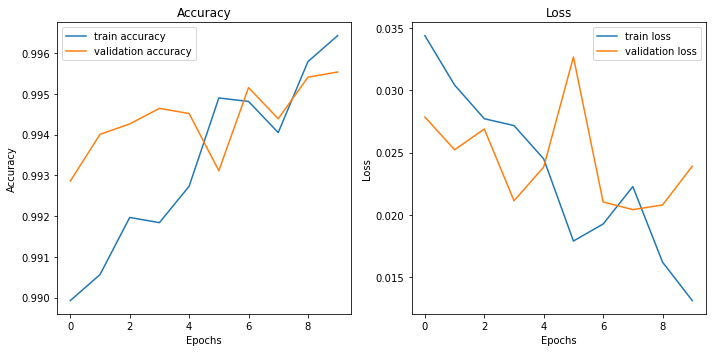

In [28]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(trained_model_conv.history['accuracy'], label='train accuracy')
plt.plot(trained_model_conv.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(trained_model_conv.history['loss'], label='train loss')
plt.plot(trained_model_conv.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# GUI

In [31]:
#Importing libraries 
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy


In [34]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }
                 
#initialise GUI
top=tk.Tk()
top.geometry('1000x600')
top.title('Traffic sign classification')
top['bg']='#B5EAAA'
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)



def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.44,rely=0.78)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=15,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()

top.mainloop()

Traffic signals
General caution
